## Project milk quality

### Objective:
- In this project we are going to the investigative phase of Milk_Diagnostic (a device for collecting and sending milk data on the farm via SMS), we are going to carry out a survey of the variation in milk temperature over a given period. Here we will make a prediction of these temperatures, using reinforcement learning for the next few minutes to alert both the producer and the collecting company about a possible spike in the temperature of the milk stored on the farm, before the event happens.

- Nesse projeto vamos para a fase investigatória do Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms), vamos treinar um modelo de classificação, utilizando modelos de machine learning para demonstrar se a variação de temperatura indica alguma anomalia ou não de contaminação no leite que está armazenado no tanque da fazenda, aguardando ser recolhido.

### Data Origin:
- Dataset: MILK_temperature.TXT

- Through the Milk_Diagnostic equipment (device for collecting and sending milk data on the farm via SMS) data on milk temperature, ambient temperature, date, time, humidity, geographic coordinates, are transferred daily from the farm's milk reservoir every 10 minutes (configurable), 24 hours a day, 7 days a week.

- Através do equipamento Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms)os dados de temperatura do leite, temperatura ambiente, data, hora, umidade, coordenadas geográficas, são transferidos diariamente do reservatório de leite da fazenda a cada 10 minutos (configurável), 24 horas por dia durante os 7 dias da semana.

Aqui está o que as colunas representam:

    local: identificador da fazendo origem do leite
    data: data da coleta da temperatura
    hora: hora, minutos e segundos da coleta da temperatura
    lat: latitude do local da fazenda
    long: longitude do local da fazenda
    umidade: umidade ambiente do local do tanque de leite
    t_ex: temperatura ambiente do local do tanque de leite
    t1, t2, t3, t4, t5, t6, t7, t8: 
        temperaturas coletadas dentro do intervalo configurado para envio (10 minutos para esse trabalho)

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [2]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [3]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import OrdinalEncoder # convertendo dados categoricos em numerico (categoria sequencial)
from sklearn.preprocessing import OneHotEncoder # convertendo dados categoricos em numerico (categoria - coluna)

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computação de matrizes

In [4]:
# preparação e visualização de dados
from matplotlib import pyplot as plt # plotagem gráfica

In [5]:
# carregando dados do arquivo
df_milk = pd.read_csv('dataset/MILK_temperature.csv', sep='p')

In [6]:
# verificando a quantidade de linhas e colunas do dataframe
df_milk.shape

(14327, 16)

In [7]:
# reconhecendo as primeiras linhas do dataframe
df_milk.head(3)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,Unnamed: 15
0,1,0/ 0/2000,6:36:19,-18.918142,-48.230560,67.000000,26.799999,NAN,10.7400,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,0/ 0/2000,8:14:46,-18.918184,-48.230553,53.000000,26.700001,NAN,25.0525,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1,0/ 0/2000,8:34:31,-18.918177,-48.230583,44.000000,26.600000,NAN,24.1150,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [8]:
# eliminando a última coluna sem dados
colunas = list(df_milk.columns)

df_milk = df_milk[colunas[:15]]

In [9]:
# verificando a estrutura das variáveis e se tem algum dados nulo
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14327 entries, 0 to 14326
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   local    14327 non-null  int64  
 1   data     14327 non-null  object 
 2   hora     14327 non-null  object 
 3   lat      14327 non-null  float64
 4   long     14327 non-null  float64
 5   umidade  14327 non-null  object 
 6   t_ex     14327 non-null  object 
 7   t1       14327 non-null  object 
 8   t2       14327 non-null  float64
 9   t3       14327 non-null  float64
 10  t4       14327 non-null  float64
 11  t5       14327 non-null  float64
 12  t6       14327 non-null  float64
 13  t7       14327 non-null  float64
 14  t8       14327 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 1.6+ MB


In [10]:
# verificando as datas que precisam de correção
df_milk.data.unique()

array([' 0/ 0/2000', ' 1/ 8/2023', ' 1/ 9/2023', ' 1/10/2023',
       ' 1/11/2023', ' 2/ 8/2023', ' 2/10/2023', ' 2/11/2023',
       ' 3/ 8/2023', ' 3/10/2023', ' 3/11/2023', ' 4/ 8/2023',
       ' 4/ 9/2023', ' 4/10/2023', ' 4/11/2023', ' 5/ 8/2023',
       ' 5/10/2023', ' 5/11/2023', ' 5/12/2023', ' 6/ 8/2023',
       ' 6/10/2023', ' 6/11/2023', ' 7/ 8/2023', ' 7/10/2023',
       ' 7/11/2023', ' 8/ 9/2023', ' 8/10/2023', ' 8/11/2023',
       ' 9/ 8/2023', ' 9/ 9/2023', ' 9/10/2023', ' 9/11/2023',
       ' 9/12/2023', '10/ 9/2023', '10/10/2023', '10/11/2023',
       '11/ 8/2023', '11/ 9/2023', '11/10/2023', '12/ 9/2023',
       '12/10/2023', '13/ 7/2023', '13/ 8/2023', '13/ 9/2023',
       '13/10/2023', '14/ 7/2023', '14/ 8/2023', '14/ 9/2023',
       '14/10/2023', '15/ 7/2023', '15/ 8/2023', '15/ 9/2023',
       '15/10/2023', '16/ 7/2023', '16/ 9/2023', '16/10/2023',
       '17/ 7/2023', '17/ 9/2023', '17/10/2023', '18/ 7/2023',
       '18/ 9/2023', '18/10/2023', '19/ 7/2023', '19/ 9

In [11]:
# eliminando data inválida
df_remove = df_milk.loc[(df_milk['data'] == ' 0/ 0/2000')]
df_milk = df_milk.drop(df_remove.index)

In [12]:
# troca espaços por zero na data
def substitui_espacos_data(data): 
    return data.replace(' ', '0')

In [13]:
# troca espaços por zero na hora e modifica hora inválida para nulo
def substitui_espacos_hora(hora): 
    hora = hora.replace(' ', '0')
    
    if hora[3] == ':':
        #hora = '0' + hora[2:]
        hora = None

    return hora

In [14]:
# invoca as funções para substituir espaços por zeros e hora por nulo
df_milk['data'] = df_milk['data'].apply(substitui_espacos_data)
df_milk['hora'] = df_milk['hora'].apply(substitui_espacos_hora)

In [15]:
# cria coluna com data e hora completa
df_milk['data_hora'] = df_milk['data'] + ' ' + df_milk['hora']

In [16]:
# convertendo o tipo de dados da variável
df_milk['t1'] = df_milk['t1'].astype('float64')
df_milk['umidade'] = df_milk['umidade'].astype('float64')
df_milk['t_ex'] = df_milk['t_ex'].astype('float64')
df_milk['data_hora'] = df_milk['data_hora'].astype('datetime64[ns]')

In [17]:
# eliminando mês maior que 07
df_remove = df_milk.loc[(df_milk.data_hora.dt.month > 6)]
df_milk = df_milk.drop(df_remove.index)

- Vamos considerar somente dados até o mês 06 por apresentar melhores dados coletados

In [18]:
# eliminando dados inválidos
df_remove = df_milk.loc[(df_milk['t_ex'] < 0.1) | 
                        (df_milk['t1'] < 0.1) | 
                        (df_milk['t2'] < 0.1) | 
                        (df_milk['t3'] < 0.1) | 
                        (df_milk['t4'] < 0.1) | 
                        (df_milk['t5'] < 0.1) | 
                        (df_milk['t6'] < 0.1) | 
                        (df_milk['t7'] < 0.1) | 
                        (df_milk['t8'] < 0.1) | 
                        (df_milk['umidade'] < 0.1)
                        ]
df_milk = df_milk.drop(df_remove.index)

- Foram eliminadas temperaturas negativas e zeradas

In [19]:
# verificando a existência de nulos
df_milk.isnull().value_counts()

local  data   hora   lat    long   umidade  t_ex   t1     t2     t3     t4     t5     t6     t7     t8     data_hora
False  False  False  False  False  False    False  False  False  False  False  False  False  False  False  False        2058
              True   False  False  False    False  False  False  False  False  False  False  False  False  True         1619
              False  False  False  False    False  True   False  False  False  False  False  False  False  False           5
Name: count, dtype: int64

In [20]:
# confirmando a presença de nulos nos dados
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3682 entries, 11 to 14326
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      3682 non-null   int64         
 1   data       3682 non-null   object        
 2   hora       2063 non-null   object        
 3   lat        3682 non-null   float64       
 4   long       3682 non-null   float64       
 5   umidade    3682 non-null   float64       
 6   t_ex       3682 non-null   float64       
 7   t1         3677 non-null   float64       
 8   t2         3682 non-null   float64       
 9   t3         3682 non-null   float64       
 10  t4         3682 non-null   float64       
 11  t5         3682 non-null   float64       
 12  t6         3682 non-null   float64       
 13  t7         3682 non-null   float64       
 14  t8         3682 non-null   float64       
 15  data_hora  2063 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1), 

In [21]:
# confirmando quais variáveis possuem nulos
df_milk.isnull().sum()

local           0
data            0
hora         1619
lat             0
long            0
umidade         0
t_ex            0
t1              5
t2              0
t3              0
t4              0
t5              0
t6              0
t7              0
t8              0
data_hora    1619
dtype: int64

- A hora e t1 possuem nulos que serão eliminados no próximo passo

In [22]:
# apagando linhas com nulos
df_milk = df_milk.dropna()

In [23]:
# verificando se existe registros duplicados
df_milk.duplicated().sum()

2

In [24]:
# apagando linhas duplicadas
df_milk = df_milk.drop_duplicates()

In [25]:
# verificando quantas linhas sobraram
df_milk.shape

(2056, 16)

- Após a eliminação de algumas linhas verificamos que sobrou um nro satisfatório para a realização do nosso treinamento do modelo de aprendizado por reforço.

In [26]:
# ordenando o dataframe pela data e hora
df_milk = df_milk.sort_values(by='data_hora')

In [27]:
# resetando o index e apagando a coluna do indice antigo
df_milk = df_milk.reset_index()
df_milk = df_milk.drop(columns='index')

In [28]:
# fazendo uma análise geral das variáveis que sobraram e suas características
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      2056 non-null   int64         
 1   data       2056 non-null   object        
 2   hora       2056 non-null   object        
 3   lat        2056 non-null   float64       
 4   long       2056 non-null   float64       
 5   umidade    2056 non-null   float64       
 6   t_ex       2056 non-null   float64       
 7   t1         2056 non-null   float64       
 8   t2         2056 non-null   float64       
 9   t3         2056 non-null   float64       
 10  t4         2056 non-null   float64       
 11  t5         2056 non-null   float64       
 12  t6         2056 non-null   float64       
 13  t7         2056 non-null   float64       
 14  t8         2056 non-null   float64       
 15  data_hora  2056 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1

In [29]:
# cria uma coluna de média dos 8 valores da temperatura do leite capturados no intervalo de envio
df_milk['temp'] = (df_milk['t1'] + df_milk['t2'] + df_milk['t3'] + df_milk['t4'] + \
                   df_milk['t5'] + df_milk['t6'] + df_milk['t7'] + df_milk['t8']) / 8 

In [30]:
# verificando as variáveis que serão utilizadas nesse trabalho
df_milk[['temp', 't_ex', 'umidade']].head(10)

,temp,t_ex,umidade
0,24.423272,25.892607,47.418488
1,24.360077,25.869171,47.540405
2,24.278691,25.812103,47.464645
3,24.210923,25.660603,47.419193
4,24.170970,25.644939,47.535355
5,24.111838,25.609079,47.424244
6,24.066316,25.467169,47.166668
7,23.982315,25.413635,47.176769
8,23.893088,25.347979,47.060608
9,23.914008,25.316149,47.257576


- A temperatura do leite 'temp' está com um valor acima do normal (seria em torno de 4°) pois foi gerada em laboratório utilizando o milk diagnostic.
- Vamos então fazer uma correção nessa temperatura para aproximá-la da real.

In [31]:
# corrige a temperatura do leite gerada em laboratório
def temperatura_leite(temp):
    if int(temp) > 4:
        temp = (4 + (temp%1)) 

    if temp <= 4.2:
        temp = (3 + (temp%1)) 
    elif temp <= 4.6:
        temp = 4.0
    elif temp <= 4.8:
        temp = (5 + (temp%1)) 
    elif temp <= 4.9:
        temp = (6 + (temp%1))
    else:
        temp = (7 + (temp%1))           
        
    return temp

In [32]:
# invoca a função para correção da temperatura
df_milk.temp = df_milk['temp'].apply(temperatura_leite)

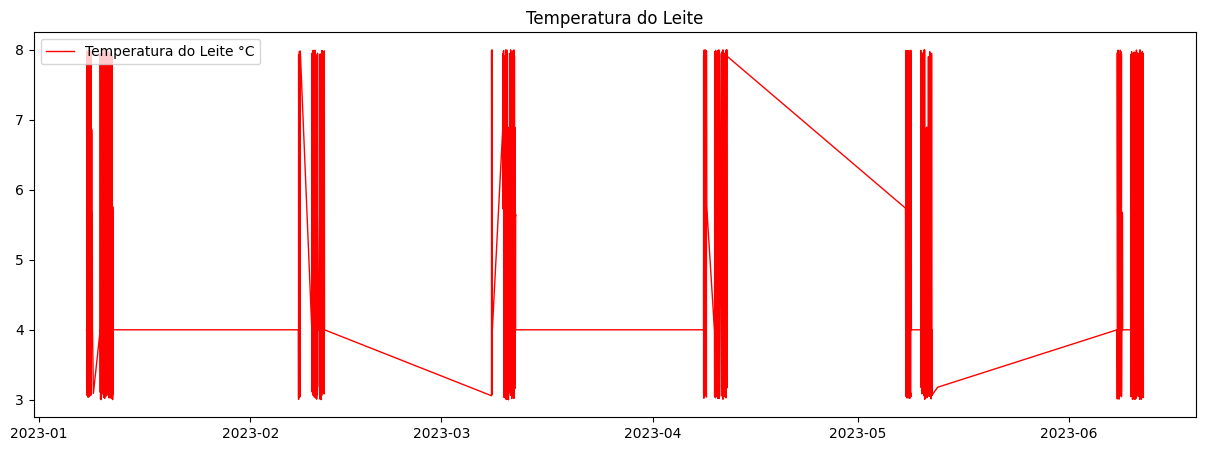

In [33]:
# plotando a evolução da temperatura do leite ajustada
fig,ax = plt.subplots(ncols=1,figsize=(15,5))

plt.plot(df_milk.data_hora, df_milk.temp, label = "Temperatura do Leite °C", linewidth=1, color='red') 

plt.title('Temperatura do Leite')
plt.legend() 

plt.savefig('grafic_image/Dados_temp_leite_fazenda.png', format='png')
plt.show()

- O gráfico nos revela que há períodos de variação estável da temperatura, variando em torno de 3°C e 4°C o que seria normal na refrigeração.

- Vemos que apresenta períodos de picos entre 3°C e 8°C que podem acontecer devido a mistura de leite novo que é acrescentado ao tanque toda manhã ou por anomalias resultado da contaminação do leite, essas variações mais altas são as que nos interessam identificar e avisar ao produtor e à empresa captadora do evento acontecido, servindo também como histórico para o controle de qualidade do leite.

- Esses picos são fundamentais para o treinamento do modelo de aprendizado por reforço, pois são eles que carregam as características de variação da temperatura que será ensinada ao modelo no seu treino.

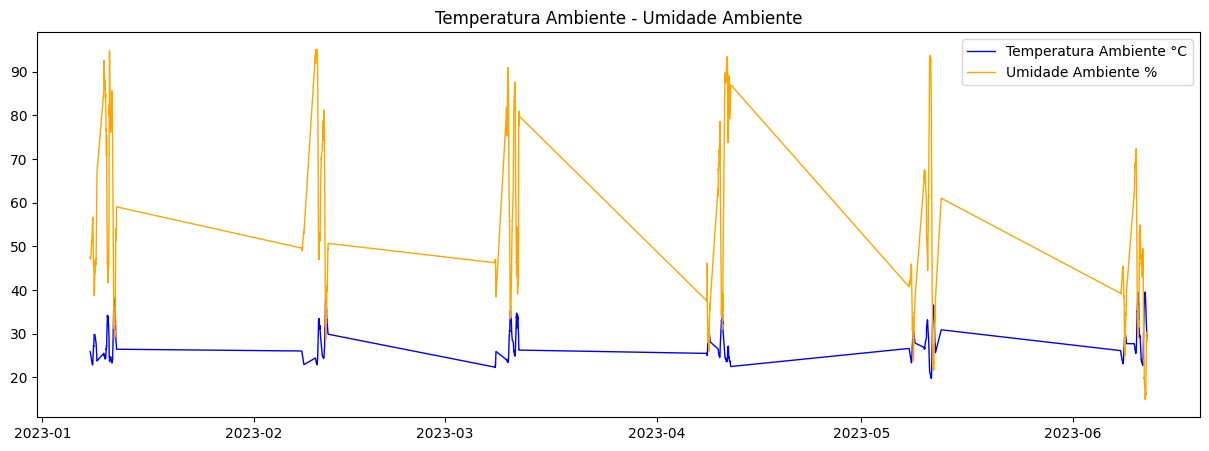

In [34]:
# plotando a evolução da temperatura ambiente e da umidade ambiente onde estava o aparelho Milk Diagnostic
fig,ax = plt.subplots(ncols=1,figsize=(15,5))

plt.plot(df_milk.data_hora, df_milk.t_ex, label = "Temperatura Ambiente °C", linewidth=1, color='blue') 
plt.plot(df_milk.data_hora, df_milk.umidade, label = "Umidade Ambiente %", linewidth=1, color='orange')  

plt.title('Temperatura Ambiente - Umidade Ambiente')
plt.legend() 

plt.savefig('grafic_image/Dados_ambiente_leite_fazenda.png', format='png')
plt.show()

- Observamos houve uma variação normal tanto da umidade ambiente (entre 10% e 95%) como da temperatura ambiente (entre 20°C e 35°C).

In [35]:
# separa parte inteira de numero
def inteiro(nro):
    return int(nro)

In [36]:
# verificando o percentual das faixas de temperaturas existentes
dfx=df_milk[['temp']]
dfx['temp_int'] = dfx.temp.apply(inteiro)
print(dfx.temp_int.value_counts(normalize=True)*100)

temp_int
4    39.688716
5    20.038911
3    19.941634
7    10.797665
6     9.533074
Name: proportion, dtype: float64


In [37]:
# eliminando mês maior ou igual que 07
df_remove = df_milk.loc[(df_milk.temp >= 7)]
df_milk = df_milk.drop(df_remove.index)

In [38]:
# define coluna anormal
def anormal(temp):
    anormal=0
    if temp<3.5 or temp>4.5:
        anormal=1
    
    return anormal

In [39]:
# invoca função para criar coluna anormal
df_milk['anormal'] = df_milk.temp.apply(anormal)

In [40]:
# verifica variavel criada
df_milk.head(5)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,data_hora,temp,anormal
0,1,01/08/2023,00:09:30,-18.918173,-48.230431,47.418488,25.892607,24.409178,24.427492,24.427492,24.427549,24.427597,24.427624,24.423851,24.415396,2023-01-08 00:09:30,4.00000,0
1,1,01/08/2023,00:19:30,-18.918213,-48.230457,47.540405,25.869171,24.345068,24.364992,24.364992,24.365047,24.365095,24.365124,24.359230,24.351067,2023-01-08 00:19:30,4.00000,0
2,1,01/08/2023,00:29:30,-18.918280,-48.230495,47.464645,25.812103,24.269100,24.302492,24.297718,24.280001,24.270069,24.265360,24.271393,24.273392,2023-01-08 00:29:30,4.00000,0
3,1,01/08/2023,00:39:30,-18.918213,-48.230446,47.419193,25.660603,24.214598,24.221876,24.217857,24.204088,24.197790,24.205063,24.211004,24.215107,2023-01-08 00:39:30,4.00000,0
4,1,01/08/2023,00:49:30,-18.918257,-48.230518,47.535355,25.644939,24.157568,24.172058,24.175756,24.176691,24.176956,24.177114,24.167929,24.163687,2023-01-08 00:49:30,3.17097,1


In [41]:
# verificando o percentual da variável anormal
print(df_milk.anormal.value_counts(normalize=True)*100)

anormal
1    55.507088
0    44.492912
Name: proportion, dtype: float64


In [42]:
# listando a relação de colunas
list(df_milk.columns)

['local',
 'data',
 'hora',
 'lat',
 'long',
 'umidade',
 't_ex',
 't1',
 't2',
 't3',
 't4',
 't5',
 't6',
 't7',
 't8',
 'data_hora',
 'temp',
 'anormal']

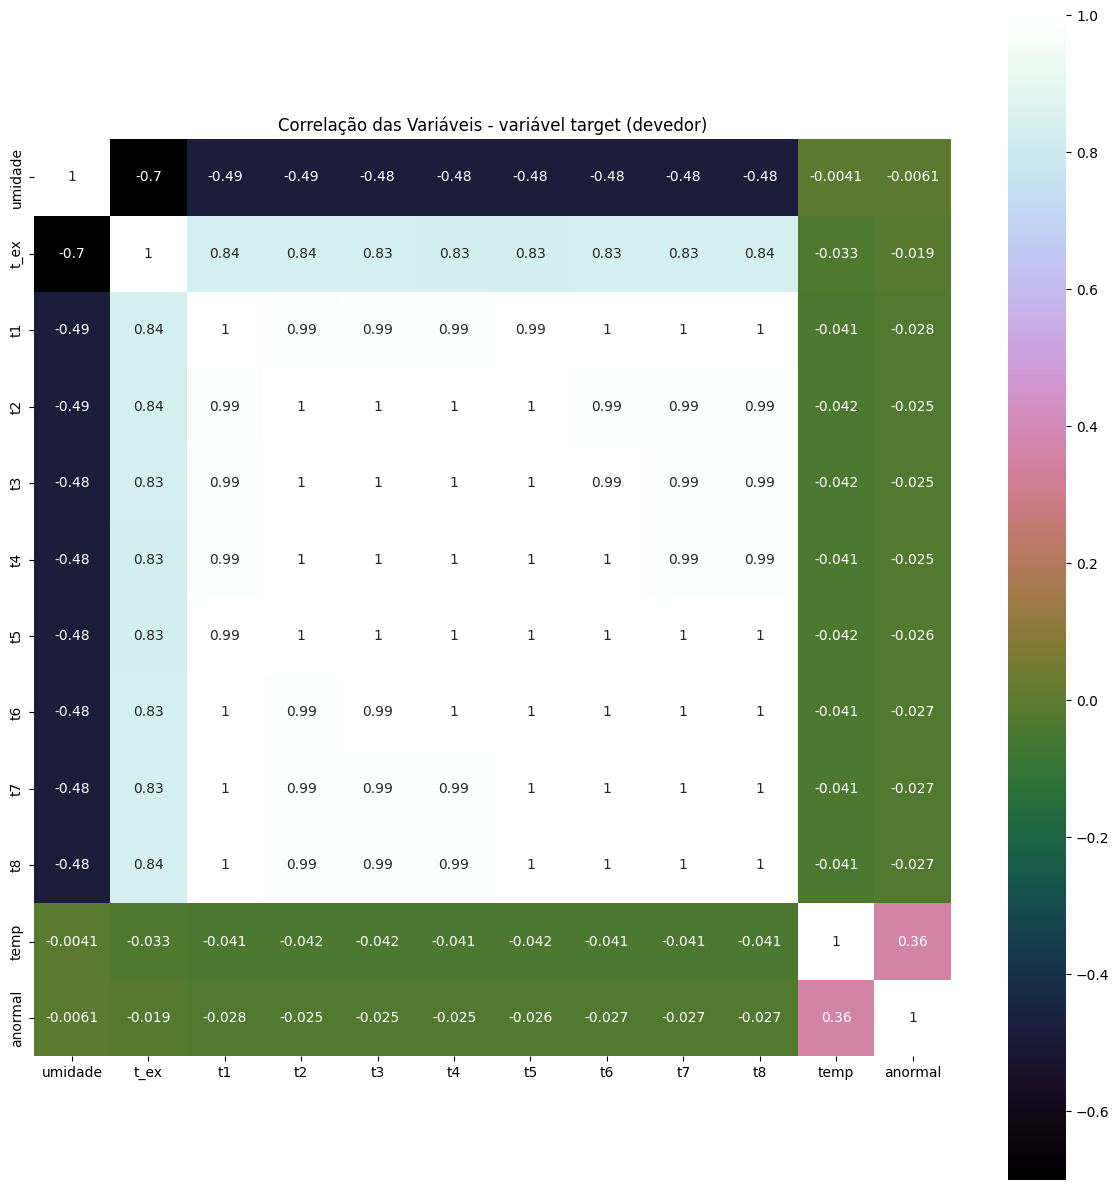

In [46]:
# analisando a correlação entre as variáveis
lista_var = list([ 'umidade',
                    't_ex',
                    't1',
                    't2',
                    't3',
                    't4',
                    't5',
                    't6',
                    't7',
                    't8',
                    'temp',
                    'anormal'])

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_milk[lista_var].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (devedor)')
fig.tight_layout()

pyplot.show()

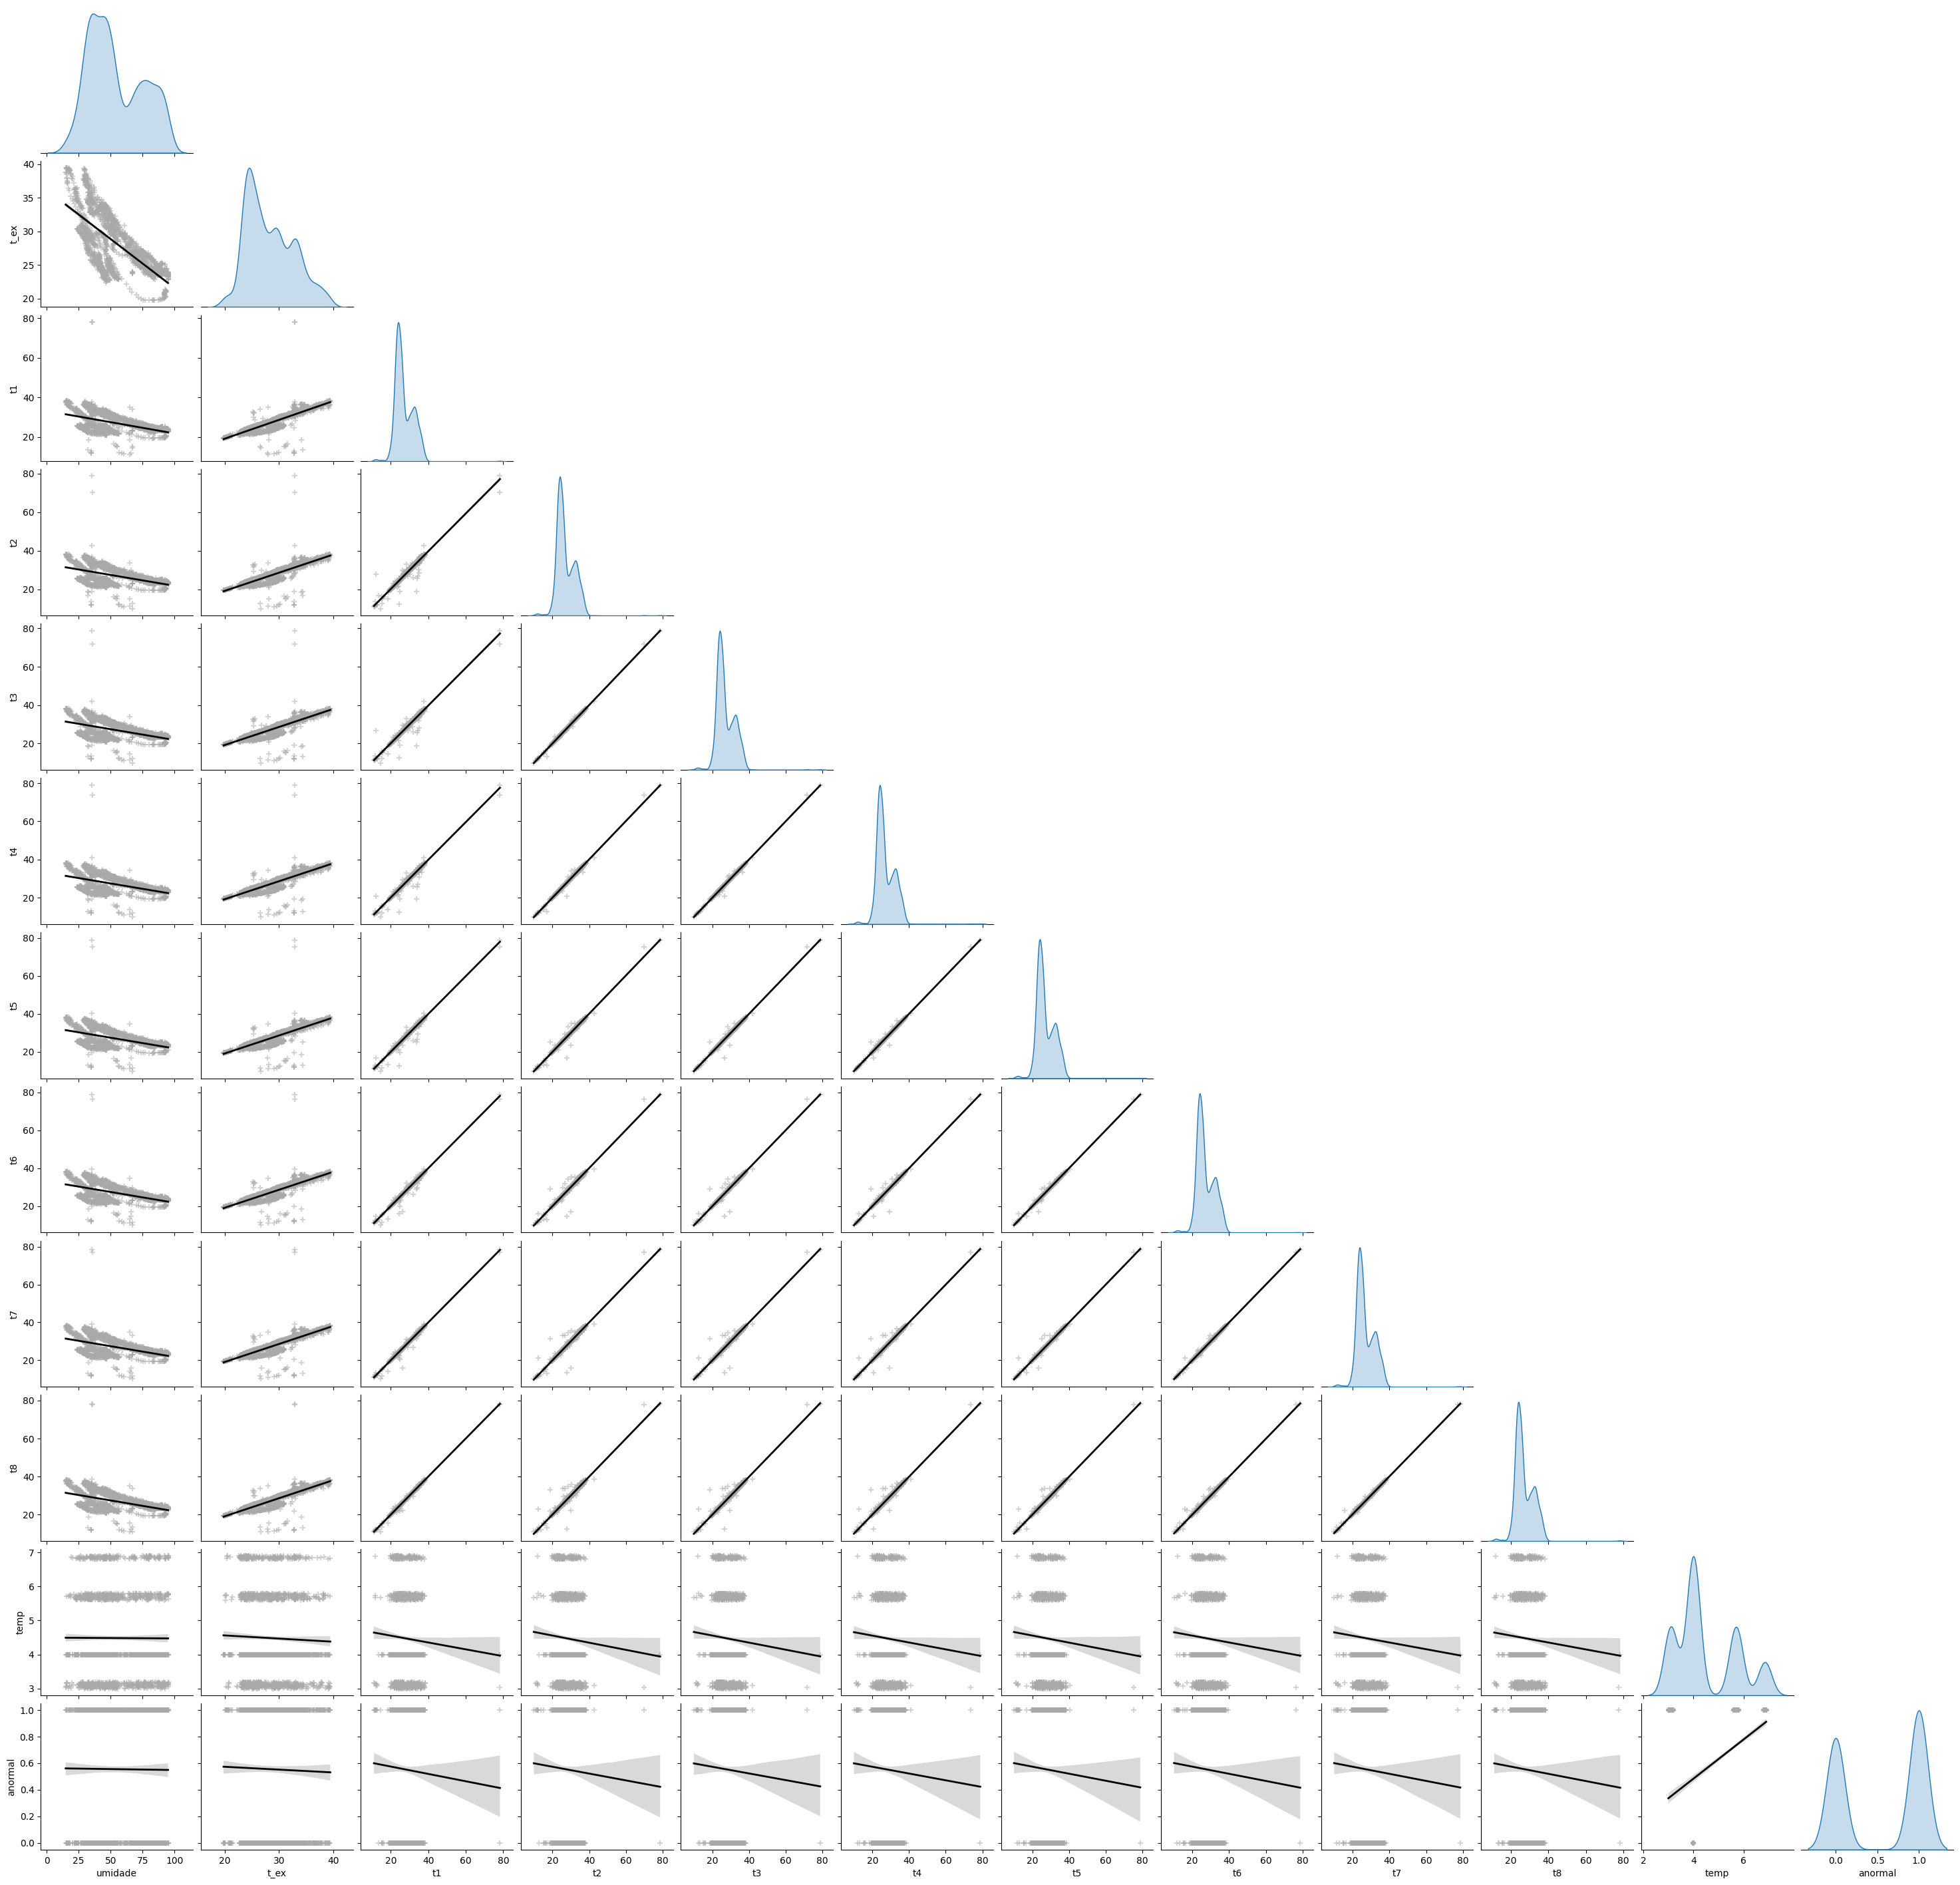

In [47]:
# verificando a dispersão das variáveis
# verificando a distribuição dos dados
p= sns.pairplot(
   df_milk[lista_var],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'lw': 2, 'color':'#000000'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#A9A9A9'}},
                kind='reg'
                )
p.fig.subplots_adjust(top=0.95)